## Import Libraries

In [91]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [246]:
df = pd.read_csv('goalkeeper.csv')
df.head()

,Unnamed: 0,team,name,height,age,appearance,yellow cards,second yellow cards,red cards,goals conceded,...,days_injured,games_injured,award,current_value,highest_value,yellow cards_total,second yellow cards_total,red cards_total,goals conceded_total,clean sheets_total
0,0,Manchester United,David de Gea,189.0,32.0,104,0.009585,0.0,0.0,1.217252,...,42,5,13,15000000,70000000,0.996805,0.0,0.0,126.594249,34.888179
1,1,Manchester United,Jack Butland,196.0,30.0,15,0.069018,0.0,0.0,1.242331,...,510,58,1,1500000,22000000,1.035276,0.0,0.0,18.634969,3.105828
2,2,Manchester United,Tom Heaton,188.0,37.0,4,0.000000,0.0,0.0,0.616438,...,697,84,4,600000,6000000,0.000000,0.0,0.0,2.465753,3.698630
3,32,West Ham United,Alphonse Areola,195.0,30.0,41,0.000000,0.0,0.0,0.898502,...,34,4,16,8000000,17500000,0.000000,0.0,0.0,36.838602,18.419301
4,33,West Ham United,Lukasz Fabianski,190.0,38.0,75,0.040767,0.0,0.0,1.331723,...,554,99,4,1000000,9000000,3.057527,0.0,0.0,99.879209,20.383512


In [247]:
df.shape

(1209, 22)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [248]:
#drop column
df.drop(columns = 'name', inplace = True)
df.drop(columns = 'Unnamed: 0', inplace = True)

In [249]:
# Accurecy types
df.dtypes

team                          object
height                       float64
age                          float64
appearance                     int64
yellow cards                 float64
second yellow cards          float64
red cards                    float64
goals conceded               float64
clean sheets                 float64
minutes played                 int64
days_injured                   int64
games_injured                  int64
award                          int64
current_value                  int64
highest_value                  int64
yellow cards_total           float64
second yellow cards_total    float64
red cards_total              float64
goals conceded_total         float64
clean sheets_total           float64
dtype: object

In [250]:
df['goals conceded_total'].astype(int)
df['clean sheets_total'].astype(int)
df['yellow cards_total'].astype(int)
df['second yellow cards_total'].astype(int)
df['red cards_total'].astype(int)


0       0
1       0
2       0
3       0
4       0
       ..
1204    0
1205    0
1206    0
1207    0
1208    0
Name: red cards_total, Length: 1209, dtype: int32

In [252]:
# Create a binary column 
df['has_award'] = df['award'].apply(lambda x: 1 if x > 0 else 0)
df['has_clean sheets'] = df['clean sheets_total'].apply(lambda x: 1 if x > 0 else 0)
df['has_second_yellow _ards'] = df['second yellow cards_total'].apply(lambda x: 1 if x > 0 else 0)
df['has__yellow _ards'] = df['yellow cards_total'].apply(lambda x: 1 if x > 0 else 0)
df['has_red_cards'] = df['red cards_total'].apply(lambda x: 1 if x > 0 else 0)
df['has_conceded_goals'] = df['goals conceded_total'].apply(lambda x: 1 if x > 0 else 0)
df['never_injured'] = df['days_injured'].apply(lambda x: 1 if x > 0 else 0)
df['never_play'] = df['appearance'].apply(lambda x: 1 if x > 0 else 0)

In [253]:
df.columns

Index(['team', 'height', 'age', 'appearance', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'yellow cards_total',
       'second yellow cards_total', 'red cards_total', 'goals conceded_total',
       'clean sheets_total', 'has_award', 'has_clean sheets',
       'has_second_yellow _ards', 'has__yellow _ards', 'has_red_cards',
       'has_conceded_goals', 'never_injured', 'never_play'],
      dtype='object')

In [254]:
# Convert categorical variables using OneHotEncoding
categorical_features = ['team']

In [176]:
for i in categorical_features:
    print(df[i].value_counts())

team
RB Leipzig                  6
Sagan Tosu                  5
Daegu FC                    5
Vitesse Arnhem              5
FC Tokyo                    5
                           ..
Western Sydney Wanderers    2
Real Sociedad               1
CSKA Moscow                 1
Real Valladolid CF          1
Gaziantep FK                1
Name: count, Length: 374, dtype: int64


In [213]:
df = df[df['team'] != 'Gaziantep FK']
df = df[df['team'] != 'Real Valladolid CF']
df = df[df['team'] != 'CSKA Moscow']
df = df[df['team'] != 'Real Sociedad']


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [16]:
df.head(2)

,team,height,age,appearance,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,...,goals conceded_total,clean sheets_total,has_award,has_clean sheets,has_second_yellow _ards,has__yellow _ards,has_red_cards,has_conceded_goals,never_injured,never_play
0,Manchester United,189.0,32.0,104,0.009585,0.0,0.0,1.217252,0.335463,9390,...,126.594249,34.888179,1,1,0,1,0,1,1,1
1,Manchester United,196.0,30.0,15,0.069018,0.0,0.0,1.242331,0.207055,1304,...,18.634969,3.105828,1,1,0,1,0,1,1,1


In [17]:
categorical_features

['team']

In [214]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [179]:
df.shape

(1205, 397)

In [20]:
df.head(2)

,height,age,appearance,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
0,189.0,32.0,104,0.009585,0.0,0.0,1.217252,0.335463,9390,42,...,False,False,False,False,False,False,False,False,False,False
1,196.0,30.0,15,0.069018,0.0,0.0,1.242331,0.207055,1304,510,...,False,False,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [21]:
#Find the correlation between the columns and delete one of the columns with high correlation.
df_num= df.select_dtypes(include=['number'])
correlation = df_num.corr()


In [22]:
import plotly.express as px

fig = px.imshow(correlation, text_auto=True, color_continuous_scale='Viridis')
fig.update_layout(
    width=800,  
    height=600,  
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns)),
    yaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns)))

In [40]:
df.head(0)

,height,age,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,...,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_أœmraniyespor,position_Attack,position_Defender,position_Midfielder


In [23]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value           1.000000
highest_value           0.833735
clean sheets_total      0.477213
minutes played          0.461293
appearance              0.460070
                          ...   
team_Damac FC          -0.020285
team_Albirex Niigata   -0.020359
team_Kashiwa Reysol    -0.020581
team_Al-Batin FC       -0.020654
team_Ettifaq FC        -0.021836
Name: current_value, Length: 397, dtype: float64


In [69]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'yellow cards_total', 'goals conceded_total',
       'clean sheets_total', 'has__yellow _ards', 'team_Real Madrid'],
      dtype='object')

In [104]:
#After seeing the selected features, I deleted two columns, 'has_yellow_cards' and 'minutes_played,' due to their high correlation with other columns.

selected_features = ['highest_value', 'appearance','award', 'current_value','yellow cards_total', 'goals conceded_total',
                     'clean sheets_total', 'team_Real Madrid']


In [105]:
df = df[selected_features]
df.head()

,highest_value,appearance,award,current_value,yellow cards_total,goals conceded_total,clean sheets_total,team_Real Madrid
0,70000000,104,13,15000000,0.996805,126.594249,34.888179,False
1,22000000,15,1,1500000,1.035276,18.634969,3.105828,False
2,6000000,4,4,600000,0.000000,2.465753,3.698630,False
3,17500000,41,16,8000000,0.000000,36.838602,18.419301,False
4,9000000,75,4,1000000,3.057527,99.879209,20.383512,False


#### 4. Prepare train and test data

In [106]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
X.shape

(1205, 6)

## Buliding the Model

In [107]:
model = LinearRegression()

## Train the Model

In [108]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [109]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [110]:
model.coef_

array([3708534.89687005,  879795.67534568, -744046.84217233,
        108374.35420972, -491260.55465469,  114499.53845285,
        361428.11590338])

In [111]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,3.708535e+06
appearance,8.797957e+05
award,-7.440468e+05
yellow cards_total,1.083744e+05
goals conceded_total,-4.912606e+05
clean sheets_total,1.144995e+05
team_Real Madrid,3.614281e+05


In [112]:
print(model.intercept_) 

1587344.398340249


In [113]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [114]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,4.795619e-01
appearance,3.556931e+04
award,-2.776928e+05
yellow cards_total,4.859130e+04
goals conceded_total,-1.521271e+04
clean sheets_total,1.422971e+04
team_Real Madrid,1.122746e+07


## Evaluating the Model 

1. Mean Square Error

In [115]:
y_base = [y_train.mean()] * len(y_test)

In [116]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 13356067076152.27


In [117]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 5497231222185.711
Mean Squared Error for testing: 4749964447498.753


2. Mean Absolute Error

In [118]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 1783822.4204128715


In [119]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1049685.6000377792
Mean Absolute Error for testing: 963350.6930047505


3. Root Mean Squared Error

In [120]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1335.5981507971892


In [121]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2344617.500187549
Root Mean Squared Error for testing: 2179441.3154519103


4. R Square

In [122]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.732543594445048
R Square for testing: 0.6416492291709865


#### Predictions vs. Real Values

In [132]:
predictions = model.predict(X_test_scaled)
#predictions

In [133]:
Real_Values = np.array(y_test)
#Real_Values

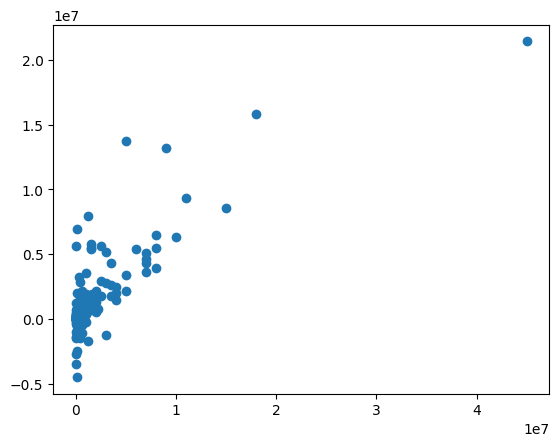

In [134]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

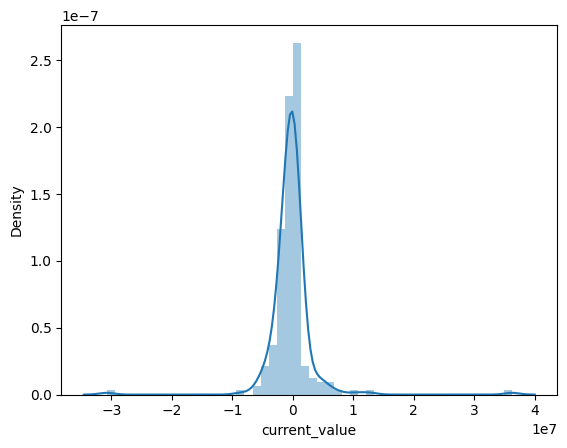

In [51]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

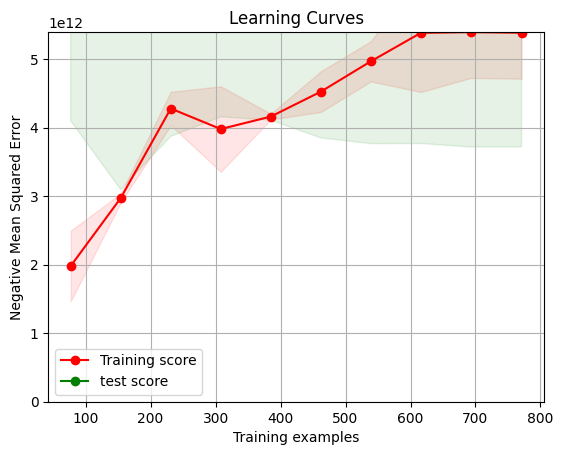

In [131]:
from sklearn.model_selection import learning_curve

rain_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for training scores
train_scores_mean = -np.mean(train_scores, axis=1)  # Negate to convert to positive MSE
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test scores
test_scores_mean = -np.mean(test_scores, axis=1)  # Negate to convert to positive MSE
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.ylim(0, np.max(train_scores_mean) + 1)
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the test scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="test score")

plt.legend(loc="best")
plt.show()

#### Cross Validation

In [127]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=7)  
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test_scaled)

# Evaluate the model on the test set
test_score = best_lasso.score(X_test_scaled, y_test)
print(f"Test Set R^2 Score: {test_score:.2f}")

Best Parameters: {'alpha': 0.01}
Best Score: 0.6594635525240721


In [ ]:
best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test_scaled)

# Evaluate the model on the test set
test_score = best_lasso.score(X_test_scaled, y_test)
print(f"Test Set R^2 Score: {test_score:.2f}")

## Model 2

In [ ]:
#I will try to reduce the complexity by reducing the number of features.

In [215]:
# Set the correlation threshold
threshold = 0.3  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value',
       'goals conceded_total', 'clean sheets_total'],
      dtype='object')

In [216]:
selected_features = ['appearance', 'highest_value', 'goals conceded_total', 'clean sheets_total','current_value']

df = df[selected_features]
df.head()


,appearance,highest_value,goals conceded_total,clean sheets_total,current_value
0,104,70000000,126.594249,34.888179,15000000
1,15,22000000,18.634969,3.105828,1500000
2,4,6000000,2.465753,3.698630,600000
3,41,17500000,36.838602,18.419301,8000000
4,75,9000000,99.879209,20.383512,1000000


In [217]:
from sklearn.preprocessing import MinMaxScaler
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [219]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [220]:
model.coef_

array([1281202.73927715, 3540721.68080706, -644229.1039267 ,
       -177848.63327822])

In [221]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,1.281203e+06
highest_value,3.540722e+06
goals conceded_total,-6.442291e+05
clean sheets_total,-1.778486e+05


In [222]:
print(model.intercept_)

1587344.398340249


In [223]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.01) 
lasso_model.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [224]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,51797.711087
highest_value,0.457861
goals conceded_total,-19949.585462
clean sheets_total,-22102.657945


1. Mean Square Error

In [225]:
y_base = [y_train.mean()] * len(y_test)

In [226]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 13356067076152.27


In [227]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 6015629014134.72
Mean Squared Error for testing: 4156616574387.2686


2. Mean Absolute Error

In [228]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 1783822.4204128715


In [229]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')


Mean Absolute Error for training: 1032257.4122200005
Mean Absolute Error for testing: 856189.2452660087


3. Root Mean Squared Error

In [230]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1335.5981507971892


In [231]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2452677.927110431
Root Mean Squared Error for testing: 2038778.206276315


4. R Square

In [232]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7073220229887216
R Square for testing: 0.6864130732059079


In [233]:
predictions = model.predict(X_test_scaled)
#predictions


In [234]:
Real_Values = np.array(y_test)
#Real_Values

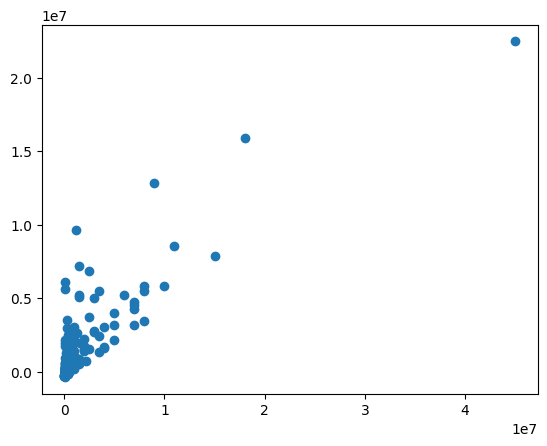

In [235]:
plt.scatter(Real_Values,predictions); 

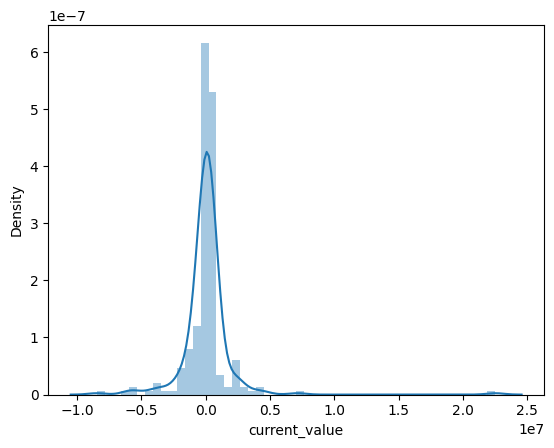

In [236]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution


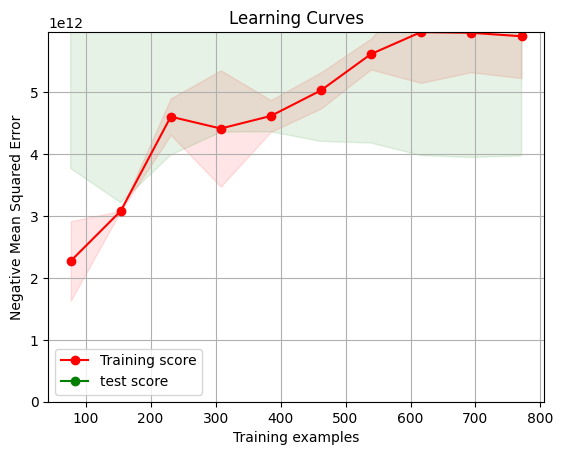

In [244]:
from sklearn.model_selection import learning_curve

rain_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for training scores
train_scores_mean = -np.mean(train_scores, axis=1)  # Negate to convert to positive MSE
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test scores
test_scores_mean = -np.mean(test_scores, axis=1)  # Negate to convert to positive MSE
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.ylim(0, np.max(train_scores_mean) + 1)
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the test scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="test score")

plt.legend(loc="best")
plt.show()

In [237]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=7)  
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 1000}
Best Score: 0.633904087848732
